In [2]:
import data
from tqdm import tqdm
import os
%matplotlib inline
# from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import torch
import numpy as np
import albumentations as A
import torchvision.transforms as T
from PIL import Image
from glob import glob
os.getcwd()

dataroot = '/opt/ml/input/purified'

  0%|          | 14/18900 [00:01<39:36,  7.95it/s]


KeyboardInterrupt: 

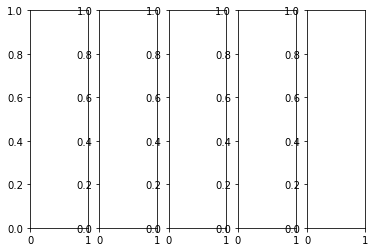

In [3]:
mask = data.NormalDataset(isTrain=True)
# gend = data.ProjectedDataset(name='gender', isTrain=True)
# age  = data.ProjectedDataset(name='age', isTrain=True)

# mask_test = data.ProjectedDataset(name='mask', isTrain=False)
# gend_test = data.ProjectedDataset(name='gender', isTrain=False)
# age_test = data.ProjectedDataset(name='age', isTrain=False)

fig = plt.figure()

n_epochs = 5
axs = [fig.add_subplot(1, n_epochs, i+1) for i in range(n_epochs)]
imgs = [] 

tosee = 1
for epoch in range(n_epochs):
    for idx, (img, label) in enumerate(tqdm(mask)):
        if label==17:
            axs[epoch].imshow(np.asarray(img).transpose((1,2,0)))
            axs[epoch].set_title(label)
            break

plt.show()

255


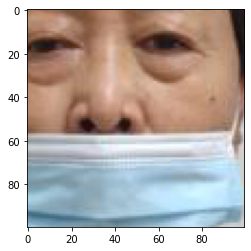

In [127]:
transforms = A.Compose([
    A.CenterCrop(350,350),
    A.Cutout(num_holes=3, max_h_size=40, max_w_size=40),
    A.Cutout(num_holes=1, max_h_size=100, max_w_size=70),
    A.RandomBrightnessContrast(),
    A.ElasticTransform(),
    A.GaussNoise(),
    A.GridDistortion(),
    A.HorizontalFlip(),
    A.Normalize(),
    # A.Normalize(mean=(0.56019358, 0.52410121, 0.501457),
    #     std=(0.23318603, 0.24300033, 0.24567522))
])

impath = os.path.join(dataroot, 'train')
all_imgs = glob(f'{impath}/**/*.*')
X = np.array(Image.open(all_imgs[0]), dtype=np.uint8)
print(X.max())
# X = transforms(image=X)
X = A.CenterCrop(100,100)(image=X)['image']
# X = transforms(image=X)
plt.imshow(X)
plt.show()